<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [3]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from scipy.stats.stats import skew
from scipy.stats.stats import pearsonr%matplotlib inline

In [6]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
data = pd.concat([train, test], keys = ['train', 'test'], 
                 ignore_index = True)
price = train['SalePrice']
print("Train set shape: ", train.shape, "\n\n Train Columns: ",
      train.columns)
print("Test set: ", test.shape, "\n\n Test Columns: ",test.columns)
print("Full Dataset shape: ", data.shape)


Train set shape:  (2051, 81) 

 Train Columns:  Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplac

In [8]:
# Count the uniques for each column for a given dataframe
def df_uniques(df):
    print('Col name,', 'Number of nulls,', 'Number of unique values', '% of nulls')
    list_of_features = []
    for col in df:
        l = [col, df[col].shape[0] - df[col].count(), df[col].unique().shape[0],
             '%.3f' %((df[col].shape[0] - df[col].count()) / df[col].shape[0])]
        list_of_features.append(l)
    # Sort by the number of NULLs: 
    list_of_features = sorted(list_of_features, key = lambda x: x[1], 
                              reverse = True)
    return list_of_features

df_uniques(train)

Col name, Number of nulls, Number of unique values % of nulls


[['Pool QC', 2042, 5, '0.996'],
 ['Misc Feature', 1986, 6, '0.968'],
 ['Alley', 1911, 3, '0.932'],
 ['Fence', 1651, 5, '0.805'],
 ['Fireplace Qu', 1000, 6, '0.488'],
 ['Lot Frontage', 330, 119, '0.161'],
 ['Garage Yr Blt', 114, 101, '0.056'],
 ['Garage Finish', 114, 4, '0.056'],
 ['Garage Qual', 114, 6, '0.056'],
 ['Garage Cond', 114, 6, '0.056'],
 ['Garage Type', 113, 7, '0.055'],
 ['Bsmt Exposure', 58, 5, '0.028'],
 ['BsmtFin Type 2', 56, 7, '0.027'],
 ['Bsmt Qual', 55, 6, '0.027'],
 ['Bsmt Cond', 55, 6, '0.027'],
 ['BsmtFin Type 1', 55, 7, '0.027'],
 ['Mas Vnr Type', 22, 5, '0.011'],
 ['Mas Vnr Area', 22, 374, '0.011'],
 ['Bsmt Full Bath', 2, 5, '0.001'],
 ['Bsmt Half Bath', 2, 4, '0.001'],
 ['BsmtFin SF 1', 1, 822, '0.000'],
 ['BsmtFin SF 2', 1, 206, '0.000'],
 ['Bsmt Unf SF', 1, 968, '0.000'],
 ['Total Bsmt SF', 1, 893, '0.000'],
 ['Garage Cars', 1, 7, '0.000'],
 ['Garage Area', 1, 515, '0.000'],
 ['Id', 0, 2051, '0.000'],
 ['PID', 0, 2051, '0.000'],
 ['MS SubClass', 0, 16, '0.000

In [7]:
def columntypes(df):
    # object features
    obj_cols = [x for x in df.columns if df[x].dtype == object]
    # features with nulls
    null_columns = [x for x in train.columns[train.isnull().any()]]
    # objects with nulls
    obj_nulls = [x for x in obj_cols if x in null_columns]
    # numeric features
    num_cols = [x for x in df.select_dtypes(include=["int", "float64"]).columns]
    # numeric features with nulls
    num_nulls = [x for x in num_cols if x in null_columns]

    return {
        "nulls":null_columns, "objects":obj_cols,
        "null objects": obj_nulls,
        "nums":num_cols,"null num": num_nulls
    }

In [5]:
# Define a function to replace nulls for many columns: 
def fill_nulls(df, col_list, na_val):
    for col in col_list:
        df[col].fillna(value = na_val, inplace = True)
    return df_uniques

In [7]:
# Categorical fields with an obvious meaning NA -> 'None'
nulls_to_none = ['PoolQC', 'Fence', 'MiscFeature', 'Alley', 'FireplaceQu', 'MasVnrType', 'BsmtCond', 
                 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish', 
                 'GarageQual', 'GarageCond', 'KitchenQual']
# Numerical fields with an obvious meaning NA -> 0
nulls_to_zero = ['LotFrontage', 'MasVnrArea', 'BsmtQual', 'GarageYrBlt', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 
                 'BsmtHalfBath', 'BsmtUnfSF', 'GarageArea', 'GarageCars', 'TotalBsmtSF']

# Categorical fields with a less obvious interpretation - guessing that NA means 'None' (there are very few anyway)
nulls_to_zero_2 = ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd']
nulls_to_other = ['SaleType', 'Functional']

# Apply to both test and training sets:
for df in [train, test]: 
    fill_nulls(df, nulls_to_none, 'None')
    fill_nulls(df, nulls_to_zero, 0)
    fill_nulls(df, nulls_to_zero_2, 0)
    fill_nulls(df, nulls_to_other, 'Other')
# NB we still have 'data_full' which has not been updated yet

In [8]:
# Print out data types
def data_types(df):
    for col in df:
        print(col, type(df[col][1]))   

In [9]:
data_types(train)


Id <class 'numpy.int64'>
PID <class 'numpy.int64'>
MSSubClass <class 'numpy.int64'>
MSZoning <class 'str'>
LotFrontage <class 'numpy.float64'>
LotArea <class 'numpy.int64'>
Street <class 'str'>
Alley <class 'str'>
LotShape <class 'str'>
LandContour <class 'str'>
Utilities <class 'str'>
LotConfig <class 'str'>
LandSlope <class 'str'>
Neighborhood <class 'str'>
Condition1 <class 'str'>
Condition2 <class 'str'>
BldgType <class 'str'>
HouseStyle <class 'str'>
OverallQual <class 'numpy.int64'>
OverallCond <class 'numpy.int64'>
YearBuilt <class 'numpy.int64'>
YearRemod/Add <class 'numpy.int64'>
RoofStyle <class 'str'>
RoofMatl <class 'str'>
Exterior1st <class 'str'>
Exterior2nd <class 'str'>
MasVnrType <class 'str'>
MasVnrArea <class 'numpy.float64'>
ExterQual <class 'str'>
ExterCond <class 'str'>
Foundation <class 'str'>
BsmtQual <class 'str'>
BsmtCond <class 'str'>
BsmtExposure <class 'str'>
BsmtFinType1 <class 'str'>
BsmtFinSF1 <class 'numpy.float64'>
BsmtFinType2 <class 'str'>
BsmtFinSF2

In [10]:
# # By pasting the above list into a spreadsheet and cross checking with the data dictionary, we can 
# # see which category each field should be

# # statsmodel requires all fieldsnames to begin with letters, so let's sort this out now.
# train = train.rename(columns = {'1stFlrSF': 'FirstFlrSF','2ndFlrSF': 'SecondFlrSF','3SsnPorch': 'ThreeSsnPorch'})
# test = test.rename(columns = {'1stFlrSF': 'FirstFlrSF','2ndFlrSF': 'SecondFlrSF','3SsnPorch': 'ThreeSsnPorch'})
# data_full = pd.concat([train, test], keys = ['train', 'test'])

# # Makes lists of each type
# categories = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
#               'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 
#               'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 
#               'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType2', 'Heating', 
#               'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 
#               'GarageFinish', 'GarageCars', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 
#               ]
# floats = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
#           'FirstFlrSF', 'SecondFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
#           'EnclosedPorch', 'ThreeSsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

# ints = ['OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 
#          'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces']

# bools = ['CentralAir']

# feature_names = categories + floats + ints + bools

# # Define a function for converting a list of columns to a particular type: 
# def convert_col_type(df, cols, type):
#     for col in cols:
#         df[col] = df[col].astype(type)

In [11]:
# # Convert each column for both test and training sets:
# for df in [train, test]:
#     convert_col_type(df, categories, 'category')
#     convert_col_type(df, floats, 'float')
#     convert_col_type(df, ints, 'int')
#     convert_col_type(df, bools, 'bool')
    
# # Re-define the full dataset
# data = pd.concat([train, test], keys = ['train', 'test'])

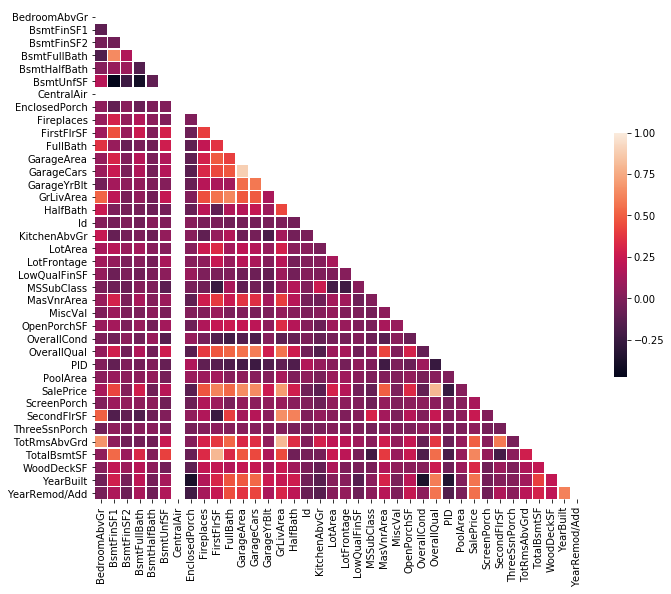

In [12]:
# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, #cmap=cmap, vmax=.3,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

# Simpler version (but too small to be useful)
#plt.matshow(data_full.corr())

In [13]:
# Which predictors are mostly closely correlated with SalePrice?
corr['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.800207
GrLivArea        0.697038
GarageArea       0.649897
GarageCars       0.647781
TotalBsmtSF      0.629303
FirstFlrSF       0.618486
YearBuilt        0.571849
YearRemod/Add    0.550370
FullBath         0.537969
TotRmsAbvGrd     0.504014
MasVnrArea       0.503579
Fireplaces       0.471093
BsmtFinSF1       0.423856
OpenPorchSF      0.333476
WoodDeckSF       0.326490
LotArea          0.296566
BsmtFullBath     0.283332
HalfBath         0.283001
GarageYrBlt      0.258645
SecondFlrSF      0.248452
BsmtUnfSF        0.190861
LotFrontage      0.181456
BedroomAbvGr     0.137067
ScreenPorch      0.134581
ThreeSsnPorch    0.048732
PoolArea         0.023106
BsmtFinSF2       0.016432
MiscVal         -0.007375
LowQualFinSF    -0.041594
BsmtHalfBath    -0.045290
Id              -0.051398
MSSubClass      -0.087335
OverallCond     -0.097019
KitchenAbvGr    -0.125444
EnclosedPorch   -0.135656
PID             -0.255052
CentralAir            NaN
Name: SalePr

In [14]:
sns.regplot(data['Gr Liv Area'], data['SalePrice'])

SalePrice        1.000000
OverallQual      0.800207
GrLivArea        0.697038
GarageArea       0.649897
GarageCars       0.647781
TotalBsmtSF      0.629303
FirstFlrSF       0.618486
YearBuilt        0.571849
YearRemod/Add    0.550370
FullBath         0.537969
TotRmsAbvGrd     0.504014
MasVnrArea       0.503579
Fireplaces       0.471093
BsmtFinSF1       0.423856
OpenPorchSF      0.333476
WoodDeckSF       0.326490
LotArea          0.296566
BsmtFullBath     0.283332
HalfBath         0.283001
GarageYrBlt      0.258645
SecondFlrSF      0.248452
BsmtUnfSF        0.190861
LotFrontage      0.181456
BedroomAbvGr     0.137067
ScreenPorch      0.134581
ThreeSsnPorch    0.048732
PoolArea         0.023106
BsmtFinSF2       0.016432
MiscVal         -0.007375
LowQualFinSF    -0.041594
BsmtHalfBath    -0.045290
Id              -0.051398
MSSubClass      -0.087335
OverallCond     -0.097019
KitchenAbvGr    -0.125444
EnclosedPorch   -0.135656
PID             -0.255052
CentralAir            NaN
Name: SalePr

/Users/saqibnizami/anaconda3/envs/dsi/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


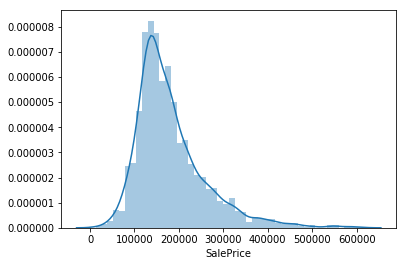

In [15]:
# What's the distribution of prices?
sales_price = train['SalePrice']
graph = sns.distplot(sales_price)

/Users/saqibnizami/anaconda3/envs/dsi/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


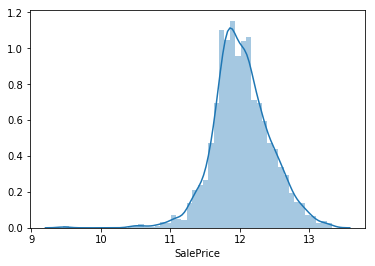

In [16]:
# Let's log-tranform this: 
sales_prices_log = np.log1p(sales_price)
graph = sns.distplot(sales_prices_log)

In [17]:
# This looks much better, so let's replace the SalePrice with the log-transformed version (will need to exponentiate predictions)
train['SalePrice'] = np.log1p(train['SalePrice'])
# Re-define the full dataset - and work on this until we are ready to split out test and train sets again
data_full = pd.concat([train, test], keys = ['train', 'test'])

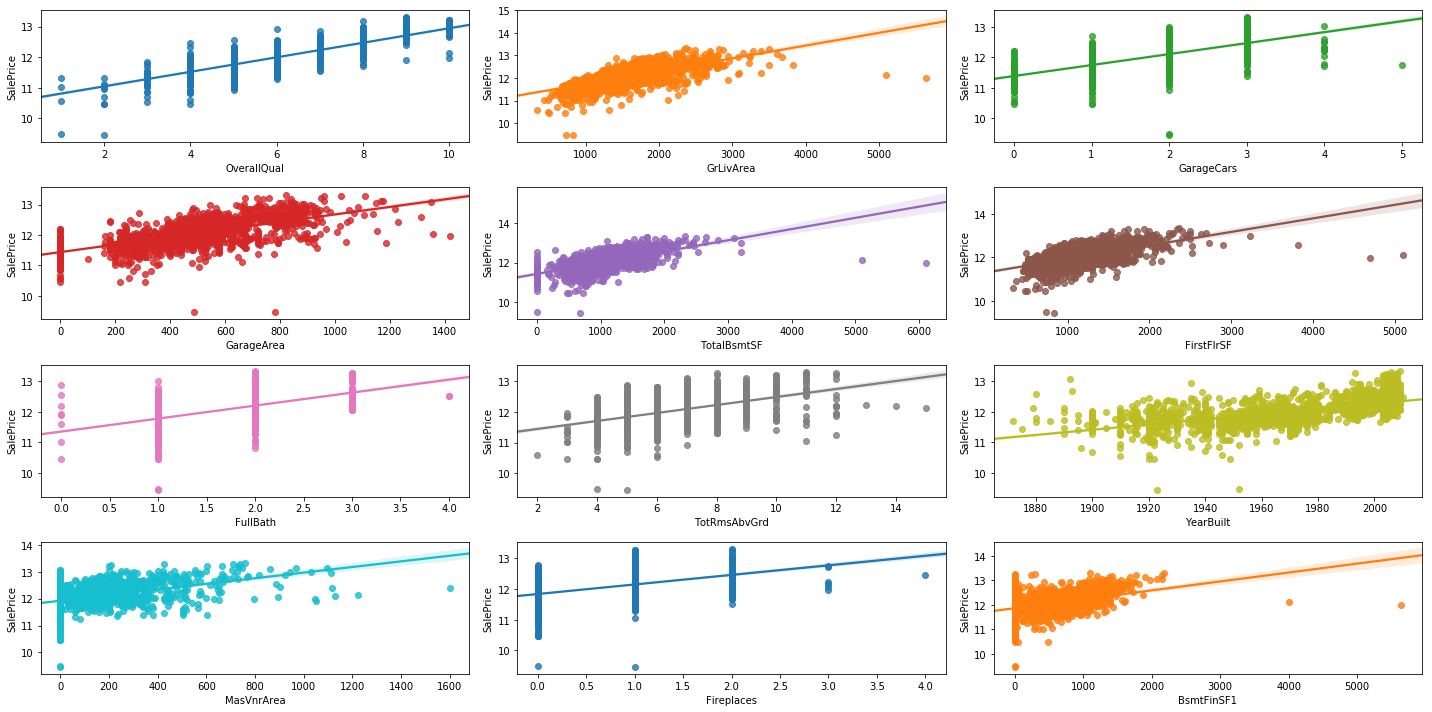

In [18]:
# Let's look at the plots of the important features identified above with SalePrice
fig, axs = plt.subplots(ncols=3, nrows=4, figsize = (20,20))
sns.regplot(x='OverallQual', y='SalePrice', data=data_full, ax=axs[0,0])
sns.regplot(x='GrLivArea', y='SalePrice', data=data_full, ax=axs[0,1])
sns.regplot(x='GarageCars',y='SalePrice', data=data_full, ax=axs[0,2])
sns.regplot(x='GarageArea',y='SalePrice', data=data_full, ax=axs[1,0])
sns.regplot(x='TotalBsmtSF',y='SalePrice', data=data_full, ax=axs[1,1])
sns.regplot(x='FirstFlrSF',y='SalePrice', data=data_full, ax=axs[1,2])
sns.regplot(x='FullBath',y='SalePrice', data=data_full, ax=axs[2,0])
sns.regplot(x='TotRmsAbvGrd',y='SalePrice', data=data_full, ax=axs[2,1])
sns.regplot(x='YearBuilt',y='SalePrice', data=data_full, ax=axs[2,2])
sns.regplot(x='MasVnrArea',y='SalePrice', data=data_full, ax=axs[3,0])
sns.regplot(x='Fireplaces',y='SalePrice', data=data_full, ax=axs[3,1])
sns.regplot(x='BsmtFinSF1',y='SalePrice', data=data_full, ax=axs[3,2])
fig.tight_layout()

In [19]:
skewed_features = data_full[floats].apply(lambda x: skew(x.dropna()))
skewed_features = skewed_features[skewed_features > 1]
skewed_features.sort_values(ascending = False)

MiscVal          21.988523
PoolArea         16.930469
LotArea          12.814334
LowQualFinSF     12.111957
ThreeSsnPorch    11.397956
BsmtFinSF2        4.138674
EnclosedPorch     4.012390
ScreenPorch       3.955441
MasVnrArea        2.617964
OpenPorchSF       2.534088
WoodDeckSF        1.841735
FirstFlrSF        1.468676
BsmtFinSF1        1.415696
GrLivArea         1.273457
TotalBsmtSF       1.150257
dtype: float64

In [20]:
skewed_features = skewed_features.index

In [21]:
# Now let's log-transform the skewed features
for col in skewed_features:
       data_full[col] = np.log1p(data_full[col])

In [22]:
# Standardise numeric features (normalise)
numeric_features = data_full.loc[:,floats]
numeric_features_st = (numeric_features - numeric_features.mean())/numeric_features.std()

In [23]:
data_full.loc[:,floats] = numeric_features_st


In [24]:
# split out the test and train sets again
train = data_full.loc['train']
test = data_full.loc['test']

/Users/saqibnizami/anaconda3/envs/dsi/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


In [25]:
# For the purposes of a multiple regression, let's use statsmodel rather than scikit learn, as it gives us
# more information, such as p-values, and hence, which regressors are important.
import statsmodels.formula.api as smf

# create a fitted model with the features that are floats: 
# lm = smf.ols(formula='SalePrice ~ LotFrontage + LotArea + MasVnrArea + BsmtFinSF1 + BsmtFinSF2 + BsmtUnfSF + TotalBsmtSF + FirstFlrSF + SecondFlrSF + LowQualFinSF + GrLivArea + GarageArea + WoodDeckSF + OpenPorchSF + EnclosedPorch + ThreeSsnPorch + ScreenPorch + PoolArea + MiscVal + OverallQual + OverallCond + BsmtFullBath + BsmtHalfBath + FullBath + BedroomAbvGr + KitchenAbvGr + TotRmsAbvGrd + Fireplaces', data=train).fit()
formula = 'SalePrice ~ ' + ' + '.join(feature_names)
lm = smf.ols(formula=formula, data=train).fit()

# print the coefficients
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     118.0
Date:                Mon, 21 May 2018   Prob (F-statistic):               0.00
Time:                        00:40:58   Log-Likelihood:                 1845.8
No. Observations:                2051   AIC:                            -3188.
Df Residuals:                    1799   BIC:                            -1770.
Df Model:                         251                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   1.2172      0.766      1.589      0.112      -0.285       2.720
MSZoning[T.C (all)]         0.4587      0.160      2.868      0.004       0.145       0.772
MSZoning[T.FV]              0.7319      0.156      4.685      0.000       0.426       1.038
MSZoning[T.I (all)]         0.2653      0.098      2.712      0.007       0.073       0.457
MSZoning[T.RH]              0.7306      0.159      4.607      0.000       0.420       1.042
MSZoning[T.RL]              0.7019      0.154      4.559      0.000       0.400       1.004
MSZoning[T.RM]              0.6641      0.155      4.282      0.000       0.360       0.968
Street[T.Pave]              0.0919      0.050      1.835      0.067      -0.006       0.190
Alley[T.None]              -0.0168      0.015     -1.096      0.273      -0.047       0.013
Alley[T.Pave]              -0.0230      0.023     -1.000      0.317      -0.068       0.022
LotShape[T.IR2]            -0.0008      0.017     -0.050      0.960      -0.033       0.032
LotShape[T.IR3]            -0.0495      0.040     -1.244      0.214      -0.128       0.029
LotShape[T.Reg]             0.0043      0.006      0.667      0.505      -0.008       0.017
LandContour[T.HLS]          0.0125      0.020      0.629      0.529      -0.026       0.051
LandContour[T.Low]         -0.0211      0.025     -0.837      0.402      -0.070       0.028
LandContour[T.Lvl]         -0.0032      0.015     -0.219      0.826      -0.032       0.026
Utilities[T.NoSeWa]        -0.1939      0.117     -1.661      0.097      -0.423       0.035
Utilities[T.NoSewr]         0.2653      0.098      2.712      0.007       0.073       0.457
LotConfig[T.CulDSac]        0.0138      0.013      1.080      0.280      -0.011       0.039
LotConfig[T.FR2]           -0.0166      0.016     -1.019      0.308      -0.049       0.015
LotConfig[T.FR3]           -0.0279      0.040     -0.701      0.483      -0.106       0.050
LotConfig[T.Inside]         0.0004      0.007      0.065      0.948      -0.013       0.014
LandSlope[T.Mod]            0.0120      0.016      0.760      0.447      -0.019       0.043
LandSlope[T.Sev]           -0.0354      0.042     -0.853      0.394      -0.117       0.046
Neighborhood[T.Blueste]     0.0472      0.056      0.843      0.399      -0.063       0.157
Neighborhood[T.BrDale]      0.0305      0.046      0.666      0.506      -0.059       0.120
Neighborhood[T.BrkSide]    -0.0082      0.037     -0.219      0.827      -0.081       0.065
Neighborhood[T.ClearCr]    -0.0252      0.038     -0.657      0.511      -0.100       0.050
Neighborhood[T.CollgCr]    -0.0597      0.030     -1.992      0.047      -0.119      -0.001
Neighborhood[T.Crawfor]     0.0258      0.034      0.753      0.452      -0.041       0.093
Neighborhood[T.Edwards]    -0.1239      0.032  

In [26]:
lm.pvalues.sort_values(ascending = False, inplace=False).tail(10)


RoofMatl[T.Membran]    3.804397e-20
RoofMatl[T.Tar&Grv]    3.212068e-24
RoofMatl[T.WdShake]    3.800488e-25
RoofMatl[T.CompShg]    1.408429e-26
MiscFeature[T.Othr]    2.164185e-27
MiscFeature[T.Shed]    6.963255e-28
RoofMatl[T.WdShngl]    3.831928e-28
MiscFeature[T.Gar2]    1.821324e-28
OverallQual            6.643759e-34
OverallCond            5.876447e-52
dtype: float64

In [27]:
lm.pvalues.sort_values(ascending = False, inplace=False).head(10)


HouseStyle[T.SLvl]      0.986837
Exterior2nd[T.Stone]    0.973820
MoSold[T.6]             0.961519
LotShape[T.IR2]         0.960245
LotConfig[T.Inside]     0.948159
BsmtCond[T.Fa]          0.939846
GarageType[T.None]      0.937466
BsmtFinType2[T.LwQ]     0.919403
HouseStyle[T.1Story]    0.918077
PoolQC[T.TA]            0.912641
dtype: float64

In [28]:
# Features - remove the thing we're trying to predict!
features = data_full.drop('SalePrice', axis = 1)

# Create dummy variables - for each categorical data, make several boolean flags
features = pd.get_dummies(features)

# Make matrices to pass to scikit learn:
X_train = features[:train.shape[0]]
X_test = features[train.shape[0]:]
y = train['SalePrice']

# Verify that the number of features has been increased due to the dummy variables:
print('Number of features in original dataset, including categorical fields: ', train.shape[1], 
      '\nNumber of features, including dummy variables for categorical fields: ', X_train.shape[1])

Number of features in original dataset, including categorical fields:  81 
Number of features, including dummy variables for categorical fields:  329


In [29]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, Lasso, LassoCV
from sklearn.model_selection import cross_val_score
#from sklearn.metrics import mean_squared_error

In [30]:
# Define root-mean-square-error function - use 10-fold cross-validation
# You have to use neg_mean_squared_error because mean_squared_error will be deprecated in future
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return rmse

# Invoke Ridge regularisation
model_ridge = Ridge()

In [31]:
# Tune parameters - the only parameter is alpha - the larger alpha, the larger the penalty for extra predictors
alphas = [0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
# Work out the RMSE for each value of the alphas above: 
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() for alpha in alphas]
cv_ridge = pd.Series(cv_ridge, index = alphas)

/Users/saqibnizami/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.246173e-21
  overwrite_a=True).T
/Users/saqibnizami/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.213204e-21
  overwrite_a=True).T
/Users/saqibnizami/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.432083e-21
  overwrite_a=True).T
/Users/saqibnizami/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guara

/Users/saqibnizami/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.127712e-19
  overwrite_a=True).T
/Users/saqibnizami/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.154219e-19
  overwrite_a=True).T
/Users/saqibnizami/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.291613e-19
  overwrite_a=True).T
/Users/saqibnizami/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guara

Text(0,0.5,'RMSE')

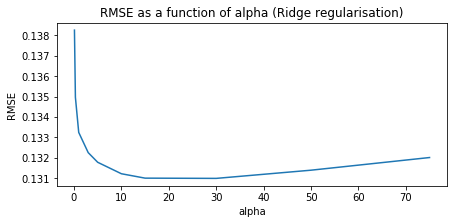

In [32]:
# Let's plot the RMSE as a function of alpha
matplotlib.rcParams['figure.figsize'] = (7,3)
cv_ridge.plot(title = 'RMSE as a function of alpha (Ridge regularisation)')
plt.xlabel('alpha')
plt.ylabel('RMSE')

In [33]:
cv_ridge.min()


0.13099600940250017

In [34]:
# This looks like it correpsonds to alpha = 30, so let's fit the model with that.
model_ridge = Ridge(alpha = 30)
model_ridge.fit(X_train, y)

/Users/saqibnizami/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.848798e-19
  overwrite_a=True).T


Ridge(alpha=30, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Text(0.5,1,'Important coefficients in the Lasso Model')

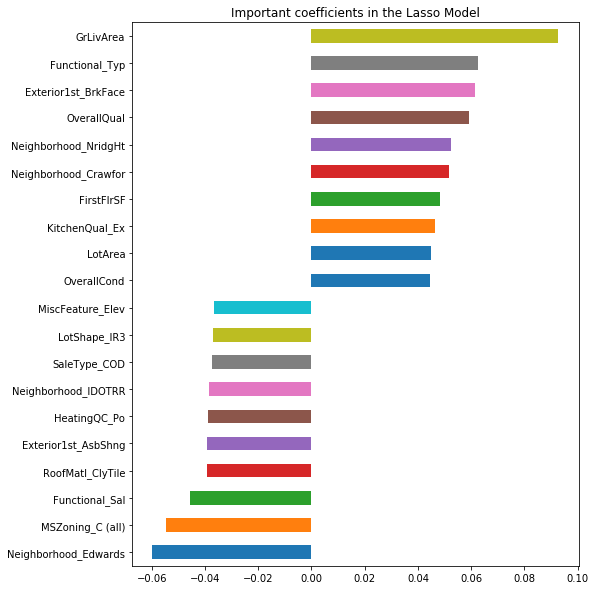

In [35]:
# What are the important coefficients here?
coef_ridge = pd.Series(model_ridge.coef_, index = X_train.columns)
important_coef_ridge = pd.concat([coef_ridge.sort_values().head(10), coef_ridge.sort_values().tail(10)])
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
important_coef_ridge.plot(kind = "barh")
plt.title('Important coefficients in the Lasso Model')

In [36]:
# How many features were eliminated? 
print("Ridge picked " + str(sum(coef_ridge != 0)) + " features and eliminated the other " + str(sum(coef_ridge == 0)) + " features")

Ridge picked 318 features and eliminated the other 11 features


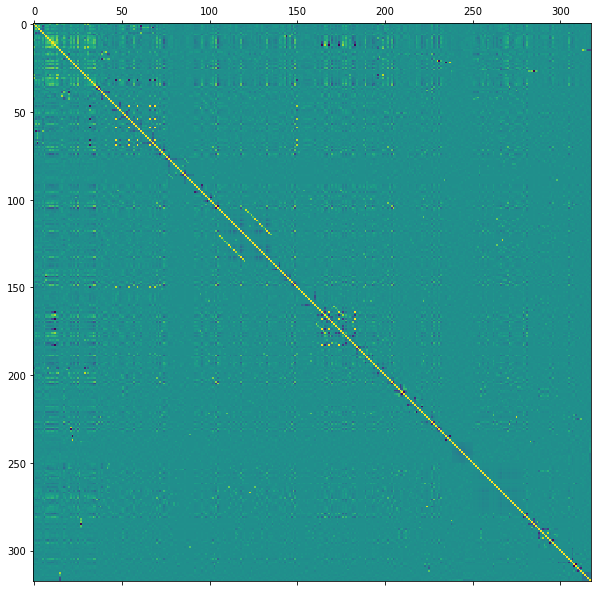

In [37]:
# Let's see what the correlation matrix looks like now: 
c = coef_ridge[coef_ridge != 0]
corr = features[c.index].corr()
plt.matshow(corr)

In [38]:
#let's look at the residuals as well:
def plot_residuals(model, X_train, y):
    matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
    preds = pd.DataFrame({"preds":model.predict(X_train), "true":y})
    preds["residuals"] = preds["true"] - preds["preds"]
    preds.plot(x = "preds", y = "residuals",kind = "scatter")

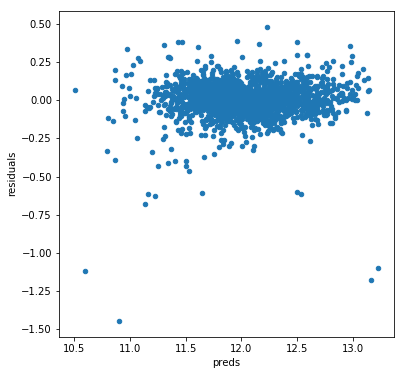

In [39]:
plot_residuals(model_ridge, X_train, y)


In [40]:
model_lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1],
                     max_iter = 50000, cv = 10).fit(X_train, y)
# Coefficients of each predictor:
coef_lasso = pd.Series(model_lasso.coef_, index = X_train.columns)

Text(0.5,1,'Important coefficients in the Lasso Model')

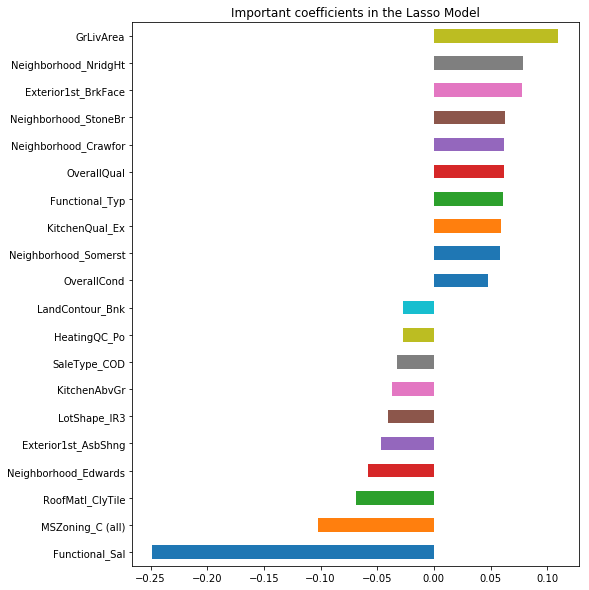

In [41]:
# What are the important coefficients here?
important_coef_lasso = pd.concat([coef_lasso.sort_values().head(10), coef_lasso.sort_values().tail(10)])
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
important_coef_lasso.plot(kind = "barh")
plt.title('Important coefficients in the Lasso Model')

In [42]:
data_full['RoofMatl'].value_counts()


CompShg    2887
Tar&Grv      23
WdShake       9
WdShngl       7
ClyTile       1
Membran       1
Metal         1
Roll          1
Name: RoofMatl, dtype: int64

In [43]:
data_full[data_full['RoofMatl'] == 'ClyTile']['SalePrice']


train  960    11.982935
Name: SalePrice, dtype: float64

In [44]:
# How many features were eliminated? 
print("Lasso picked " + str(sum(coef_lasso != 0)) + " features and eliminated the other " + str(sum(coef_lasso == 0)) + " features")

Lasso picked 104 features and eliminated the other 225 features


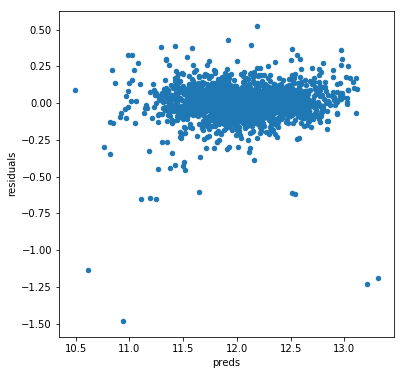

In [45]:
# Let's have a look at the residuals of this too.    
plot_residuals(model_lasso, X_train, y)

In [46]:
from sklearn.linear_model import ElasticNetCV


In [47]:
model_elastic = ElasticNetCV(l1_ratio = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 
                                    0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
model_elastic.fit(X_train, y)
alpha = model_elastic.alpha_
ratio = model_elastic.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

Best l1_ratio : 0.5
Best alpha : 0.0006


In [48]:
coef_elastic = pd.Series(model_elastic.coef_, index = X_train.columns)


In [49]:
# How many features were eliminated? 
print("Elastic picked " + str(sum(coef_elastic != 0)) + " features and eliminated the other " + str(sum(coef_elastic == 0)) + " features")

Elastic picked 149 features and eliminated the other 180 features


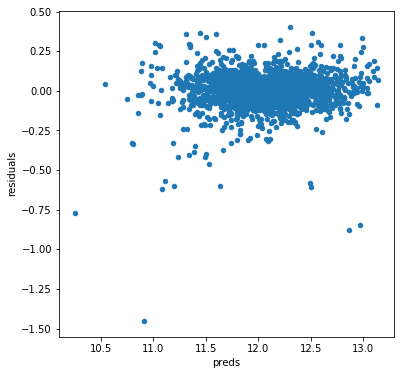

In [50]:
plot_residuals(model_elastic, X_train, y)


In [51]:
ridge_preds = np.expm1(model_ridge.predict(X_test))
lasso_preds = np.expm1(model_lasso.predict(X_test))
elastic_preds = np.expm1(model_elastic.predict(X_test))

In [52]:
preds = {'ridge': ridge_preds, 'lasso': lasso_preds, 'elastic': elastic_preds}


In [53]:
from datetime import datetime


In [54]:
def make_export_table(model):
    kaggle_export = pd.DataFrame({
        'id': test['Id'],
        'SalePrice': preds[model]
    },
    columns = ['id', 'SalePrice'])
    return kaggle_export

In [55]:
for model in ['ridge', 'lasso', 'elastic']:
    filebasename = 'kaggle_export'
    timestamp = datetime.today().strftime('%Y%m%d-%H%M%S')
    filename = filebasename + timestamp + model
    table = make_export_table(model)
    table.to_csv(filename, index = False)